<a href="https://colab.research.google.com/github/kelvinfoo123/Survival-Analysis/blob/main/Leukemia_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
!pip install lifelines 
from lifelines import KaplanMeierFitter 
from lifelines import CoxPHFitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
data = pd.read_csv("Leukemia.csv")

data = data.iloc[:, 1:4]
data.head()

,Remission Time (t),Censoring (d),Group (X)
0,6,1,1
1,6,1,1
2,6,1,1
3,7,1,1
4,10,1,1


## **Survival Table**

In [11]:
from lifelines.utils import survival_table_from_events 

table = survival_table_from_events(data['Remission Time (t)'], data['Censoring (d)'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,42,42
1.0,2,2,0,0,42
2.0,2,2,0,0,40
3.0,1,1,0,0,38
4.0,2,2,0,0,37
5.0,2,2,0,0,35
6.0,4,3,1,0,33
7.0,1,1,0,0,29
8.0,4,4,0,0,28


## **Kaplan-Meier Estimate (Estimate survival function)**

In [12]:
km = KaplanMeierFitter()
km.fit(data['Remission Time (t)'], event_observed = data['Censoring (d)'])
km.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.952381
2.0,0.904762
3.0,0.880952
4.0,0.833333
5.0,0.785714
6.0,0.714286
7.0,0.689655
8.0,0.591133


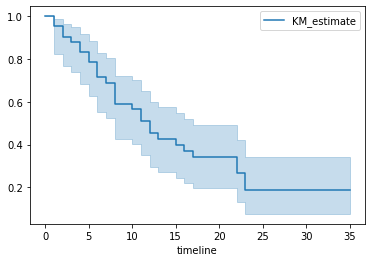

In [13]:
km.plot_survival_function()

## **Nelson Aelen Estimate (Estimate hazard rate)**

In [16]:
from lifelines import NelsonAalenFitter 

na = NelsonAalenFitter(nelson_aalen_smoothing = False)
na.fit(data['Remission Time (t)'], event_observed = data['Censoring (d)'])
na.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
1.0,0.047619
2.0,0.097619
3.0,0.123935
4.0,0.177989
5.0,0.235132
6.0,0.326041
7.0,0.360524
8.0,0.503381


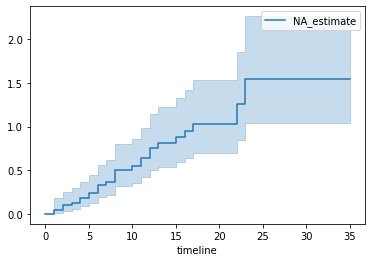

In [17]:
na.plot_cumulative_hazard()

## **Fitting parametric models**

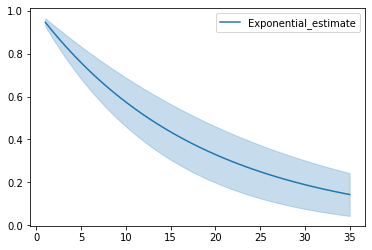

In [19]:
from lifelines import ExponentialFitter 

exp = ExponentialFitter().fit(data['Remission Time (t)'], data['Censoring (d)'])
exp.plot_survival_function()

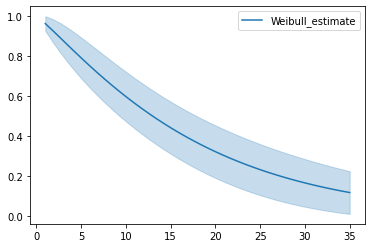

In [20]:
from lifelines import WeibullFitter
wb = WeibullFitter().fit(data['Remission Time (t)'], data['Censoring (d)'])
wb.plot_survival_function()

## **Cox-PH model**

In [22]:
ph = CoxPHFitter()
ph.fit(data, duration_col = 'Remission Time (t)', event_col = 'Censoring (d)')
ph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 'Remission Time (t)'
                event col = 'Censoring (d)'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -85.01
         time fit was run = 2022-12-20 06:08:42 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Group (X)   1.57       4.82       0.41             0.76             2.38                 2.15                10.81

            cmp to    z      p   -log2(p)
covariate                                
Group (X)     0.00 3.81 <0.005      12.83
---
Concordance = 0.69
Partial AIC = 172.02
log-likelihood ratio test = 16.35 on 1 df
-log2(p) of ll-ratio test = 14.21



*  Hazard ratio of 4.82: Patients who received treatment are 5 times more likely to die than patients who receive placebo.
*   p < 0.005: The effect of treatment is significant.



## **Model selection**

In [23]:
print('AIC of Exponential model: ', exp.AIC_)
print('AIC of Weibull model: ', wb.AIC_)

AIC of Exponential model:  235.53331383115682
AIC of Weibull model:  236.810813959495


The AIC of the Cox PH model is much lower. Hence, the Cox PH model is a much better model to fit the survival data compared to the parametric models. 